In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

In [2]:
from scipy.signal import find_peaks
from scipy.stats import pearsonr
sns.set()

# Prediction analysis on chromosome 4 

We train the CNN network on different replica (SRR7131299 and SRR7131302) in the forward strand with the chromosome 4 left aside for test.
We represent the prediction of the RNA_seq density of reads with those two different training sets.

In [3]:
WINDOW = 2001
HALF_WX = WINDOW//2

In [4]:
# Trained on SRR7131299

y_pred_fw_wt_299 = np.load('/users/invites/routhier/Documents/Projet_RNA_seq/Results_RNA_seq/y_pred_fw_CNN_RNA_seq_2001_12_8_4_SRR7131299_forward.npy')
y_pred_fw_syn_299 = np.load('/users/invites/routhier/Documents/Projet_RNA_seq/Results_RNA_seq/y_pred_fw_CNN_RNA_seq_2001_12_8_4_SRR7131299_syn_hic.npy')

y_pred_bw_wt_299 = np.load('/users/invites/routhier/Documents/Projet_RNA_seq/Results_RNA_seq/y_pred_bw_CNN_RNA_seq_2001_12_8_4_SRR7131299_backward.npy')
y_pred_bw_syn_299 = np.load('/users/invites/routhier/Documents/Projet_RNA_seq/Results_RNA_seq/y_pred_bw_CNN_RNA_seq_2001_12_8_4_SRR7131299_syn_hic.npy')

In [5]:
# Trained on SRR7131302

y_pred_fw_wt_302 = np.load('/users/invites/routhier/Documents/Projet_RNA_seq/Results_RNA_seq/y_pred_fw_CNN_RNA_seq_2001_12_8_4_SRR7131302_forward.npy')
y_pred_fw_syn_302 = np.load('/users/invites/routhier/Documents/Projet_RNA_seq/Results_RNA_seq/y_pred_fw_CNN_RNA_seq_2001_12_8_4_SRR7131302_syn_hic.npy')

y_pred_bw_wt_302 = np.load('/users/invites/routhier/Documents/Projet_RNA_seq/Results_RNA_seq/y_pred_bw_CNN_RNA_seq_2001_12_8_4_SRR7131302_backward.npy')
y_pred_bw_syn_302 = np.load('/users/invites/routhier/Documents/Projet_RNA_seq/Results_RNA_seq/y_pred_bw_CNN_RNA_seq_2001_12_8_4_SRR7131302_syn_hic.npy')

In [6]:
# SRR7131299 and SRR7131302 aligned on chromosome 4 (data from 710000 bp to 860000 bp on SRR7131302 
# need not to be trust)

y_true_fw_wt_299 = pd.read_csv('/users/invites/routhier/Documents/Projet_RNA_seq/Start_data/SRR7131299_forward.csv')
y_true_bw_wt_299 = pd.read_csv('/users/invites/routhier/Documents/Projet_RNA_seq/Start_data/SRR7131299_backward.csv')

y_true_fw_wt_302 = pd.read_csv('/users/invites/routhier/Documents/Projet_RNA_seq/Start_data/SRR7131302_forward.csv')
y_true_bw_wt_302 = pd.read_csv('/users/invites/routhier/Documents/Projet_RNA_seq/Start_data/SRR7131302_backward.csv')

y_true_fw_wt_299 = y_true_fw_wt_299[y_true_fw_wt_299.chr == 'chr4'].value.values
y_true_bw_wt_299 = y_true_bw_wt_299[y_true_bw_wt_299.chr == 'chr4'].value.values

y_true_fw_wt_302 = y_true_fw_wt_302[y_true_fw_wt_302.chr == 'chr4'].value.values
y_true_bw_wt_302 = y_true_bw_wt_302[y_true_bw_wt_302.chr == 'chr4'].value.values

In [7]:
y_true_fw_wt_299 = y_true_fw_wt_299.astype(np.float32)
y_true_bw_wt_299 = y_true_bw_wt_299.astype(np.float32)

y_true_fw_wt_299[y_true_fw_wt_299 > 0] = np.log(y_true_fw_wt_299[y_true_fw_wt_299 > 0])
y_true_bw_wt_299[y_true_bw_wt_299 > 0] = np.log(y_true_bw_wt_299[y_true_bw_wt_299 > 0])

y_true_fw_wt_302 = y_true_fw_wt_302.astype(np.float32)
y_true_bw_wt_302 = y_true_bw_wt_302.astype(np.float32)

y_true_fw_wt_302[y_true_fw_wt_302 > 0] = np.log(y_true_fw_wt_302[y_true_fw_wt_302 > 0])
y_true_bw_wt_302[y_true_bw_wt_302 > 0] = np.log(y_true_bw_wt_302[y_true_bw_wt_302 > 0])


In [8]:
y_true_fw_wt_299 = y_true_fw_wt_299[HALF_WX : - HALF_WX]
y_true_bw_wt_299 = y_true_bw_wt_299[HALF_WX : - HALF_WX]

y_true_fw_wt_302 = y_true_fw_wt_302[HALF_WX : - HALF_WX]
y_true_bw_wt_302 = y_true_bw_wt_302[HALF_WX : - HALF_WX]

In [9]:
y_pred_bw_wt_299 = y_pred_bw_wt_299[::-1]
y_pred_bw_wt_302 = y_pred_bw_wt_302[::-1]

In [10]:
y_true_fw_syn_302 = pd.read_csv('/users/invites/routhier/Documents/Projet_RNA_seq/Start_data/SRR7131302_syn_hic.csv')

In [11]:
y_true_fw_syn_302 = y_true_fw_syn_302[y_true_fw_syn_302.chr == 'chr4'].value.values
y_true_fw_syn_302 = y_true_fw_syn_302.astype(np.float32)
y_true_fw_syn_302[y_true_fw_syn_302 > 0] = np.log(y_true_fw_syn_302[y_true_fw_syn_302 > 0])
y_true_fw_syn_302 = y_true_fw_syn_302[HALF_WX : - HALF_WX]


In [12]:
y_pred_bw_syn_299 = y_pred_bw_syn_299[::-1]
y_pred_bw_syn_302 = y_pred_bw_syn_302[::-1]

### Comparing the prediction coming from two differently trained CNN

Text(150000,10,' correlation : 0.955919206142')

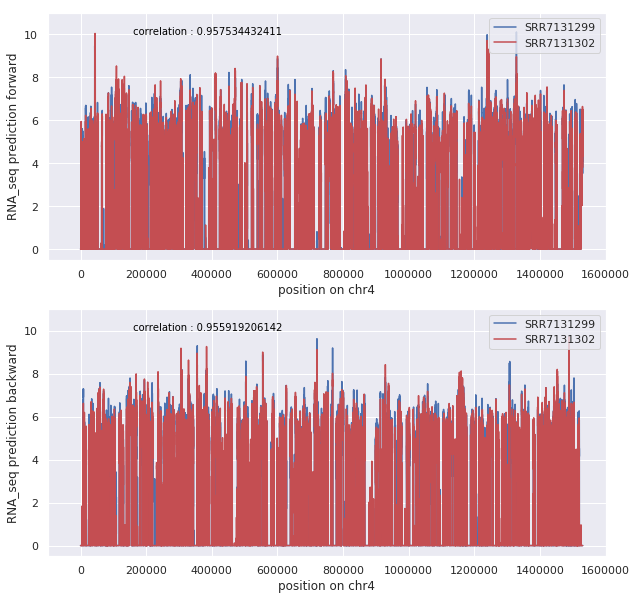

In [13]:
fig = plt.figure(figsize=(10,10))

ax = [None for _ in range(2)]
ax[0] = fig.add_subplot(2,1,1)

ax[0].plot(y_pred_fw_wt_299, color='b', label='SRR7131299')
ax[0].plot(y_pred_fw_wt_302, color='r', label='SRR7131302')
ax[0].axis([-100000,1600000,-0.5,11])
ax[0].legend(loc='upper right')
ax[0].set(xlabel='position on chr4', ylabel='RNA_seq prediction forward')
ax[0].text(150000, 10, ' correlation : {}'.format(pearsonr(y_pred_fw_wt_299, y_pred_fw_wt_302)[0]), color='black', size=10,
       bbox=dict(facecolor='none', edgecolor='none'))

ax[1] = fig.add_subplot(2,1,2)

ax[1].plot(y_pred_bw_wt_299, color='b', label='SRR7131299')
ax[1].plot(y_pred_bw_wt_302, color='r', label='SRR7131302')
ax[1].axis([-100000,1600000,-0.5,11])
ax[1].legend(loc='upper right')
ax[1].set(xlabel='position on chr4', ylabel='RNA_seq prediction backward')
ax[1].text(150000, 10, ' correlation : {}'.format(pearsonr(y_pred_bw_wt_299, y_pred_bw_wt_302)[0]), color='black', size=10,
       bbox=dict(facecolor='none', edgecolor='none'))

### Prediction vs experimental (SRR7131299)

Text(150000,11,' correlation : 0.869862854481')

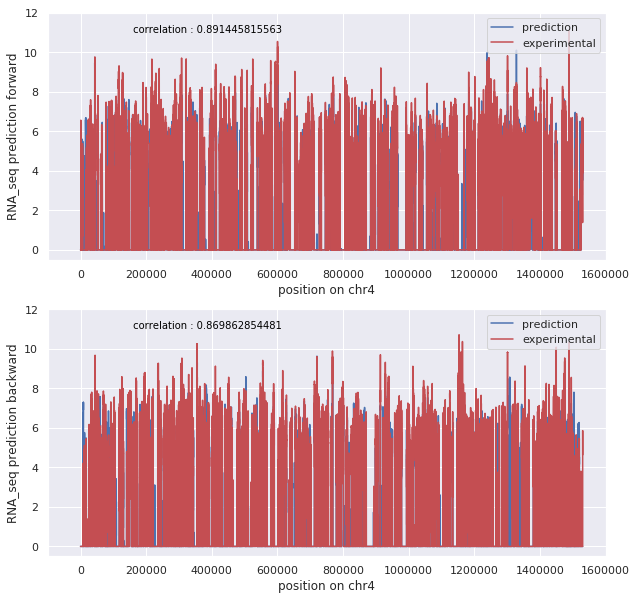

In [14]:
fig = plt.figure(figsize=(10,10))

ax = [None for _ in range(2)]
ax[0] = fig.add_subplot(2,1,1)

ax[0].plot(y_pred_fw_wt_299, color='b', label='prediction')
ax[0].plot(y_true_fw_wt_299, color='r', label='experimental')
ax[0].axis([-100000,1600000,-0.5,12])
ax[0].legend(loc='upper right')
ax[0].set(xlabel='position on chr4', ylabel='RNA_seq prediction forward')
ax[0].text(150000, 11, ' correlation : {}'.format(pearsonr(y_pred_fw_wt_299, y_true_fw_wt_299)[0]), color='black', size=10,
       bbox=dict(facecolor='none', edgecolor='none'))

ax[1] = fig.add_subplot(2,1,2)

ax[1].plot(y_pred_bw_wt_299, color='b', label='prediction')
ax[1].plot(y_true_bw_wt_299, color='r', label='experimental')
ax[1].axis([-100000,1600000,-0.5,12])
ax[1].legend(loc='upper right')
ax[1].set(xlabel='position on chr4', ylabel='RNA_seq prediction backward')
ax[1].text(150000, 11, ' correlation : {}'.format(pearsonr(y_pred_bw_wt_299, y_true_bw_wt_299)[0]), color='black', size=10,
       bbox=dict(facecolor='none', edgecolor='none'))

The predictions exhibit a difference in terms of genes activation but not on gene position.
We will focus on gene activation in the following of the study.

### Mean gene activity

We represent scatter plots of mean gene activation for every pair in the experimental alignment and the prediction coming from both CNN. The gene positioning is already known.

In [15]:
annotation = pd.read_csv('/home/invites/routhier/Projet_RNA_seq/Start_data/annotation_s_cerevisiae/Saccharomyces_cerevisiae.R64-1-1.95.chromosome.IV.gff3', sep = '\t')
annotation = annotation[annotation.type == 'gene']
annotation.head()

,chr,1,type,start,stop,2,strand,3,4
2,IV,sgd,gene,1802.0,2953.0,.,+,.,ID=gene:YDL248W;biotype=protein_coding;descrip...
7,IV,sgd,gene,3762.0,3836.0,.,+,.,ID=gene:YDL247W-A;biotype=protein_coding;descr...
12,IV,sgd,gene,5985.0,7814.0,.,+,.,ID=gene:YDL247W;biotype=protein_coding;descrip...
17,IV,sgd,gene,8683.0,9756.0,.,-,.,ID=gene:YDL246C;biotype=protein_coding;descrip...
22,IV,sgd,gene,11657.0,13360.0,.,-,.,ID=gene:YDL245C;biotype=protein_coding;descrip...


In [16]:
annotation_fw = annotation[annotation.strand == '+'].copy()
annotation_bw = annotation[annotation.strand == '-'].copy()

gene_fw = zip(annotation_fw.start.values - HALF_WX, annotation_fw.stop.values - HALF_WX)
gene_bw = zip(annotation_bw.start.values - HALF_WX, annotation_bw.stop.values - HALF_WX)

mean_activity_true_fw_299 = np.array([np.mean(y_true_fw_wt_299[int(start) : int(stop)]) for start, stop in gene_fw])
mean_activity_true_bw_299 = np.array([np.mean(y_true_bw_wt_299[int(start) : int(stop)]) for start, stop in gene_bw])
mean_activity_true_299 = np.append(mean_activity_true_fw_299, mean_activity_true_bw_299)

mean_activity_true_fw_302 = np.array([np.mean(y_true_fw_wt_302[int(start) : int(stop)]) for start, stop in gene_fw])
mean_activity_true_bw_302 = np.array([np.mean(y_true_bw_wt_302[int(start) : int(stop)]) for start, stop in gene_bw])
mean_activity_true_302 = np.append(mean_activity_true_fw_302, mean_activity_true_bw_302)

mean_activity_pred_fw_299 = np.array([np.mean(y_pred_fw_wt_299[int(start) : int(stop)]) for start, stop in gene_fw])
mean_activity_pred_bw_299 = np.array([np.mean(y_pred_bw_wt_299[int(start) : int(stop)]) for start, stop in gene_bw])
mean_activity_pred_299 = np.append(mean_activity_pred_fw_299, mean_activity_pred_bw_299)

mean_activity_pred_fw_302 = np.array([np.mean(y_pred_fw_wt_302[int(start) : int(stop)]) for start, stop in gene_fw])
mean_activity_pred_bw_302 = np.array([np.mean(y_pred_bw_wt_302[int(start) : int(stop)]) for start, stop in gene_bw])
mean_activity_pred_302 = np.append(mean_activity_pred_fw_302, mean_activity_pred_bw_302)

In [17]:
strand = np.array(['+' for _ in range(len(gene_fw))])
strand_ =  np.array(['-' for _ in range(len(gene_bw))])
strand = np.append(strand, strand_)

In [18]:
mean_activity = pd.DataFrame({'SRR7131299_true' : mean_activity_true_299,
                              'SRR7131302_true' : mean_activity_true_302,
                              'SRR7131299_pred' : mean_activity_pred_299,
                              'SRR7131302_pred' : mean_activity_pred_302,
                              'strand' : strand})
mean_activity.head()

,SRR7131299_pred,SRR7131299_true,SRR7131302_pred,SRR7131302_true,strand
0,4.352061,4.239463,4.714288,4.077392,+
1,0.000000,3.272309,1.600580,3.280099,+
2,3.678321,3.604259,3.291945,3.348130,+
3,5.564093,1.309114,4.664346,1.238417,+
4,1.429560,3.300261,1.159263,2.896772,+


/users/invites/routhier/anaconda2/envs/ipykernel_py2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


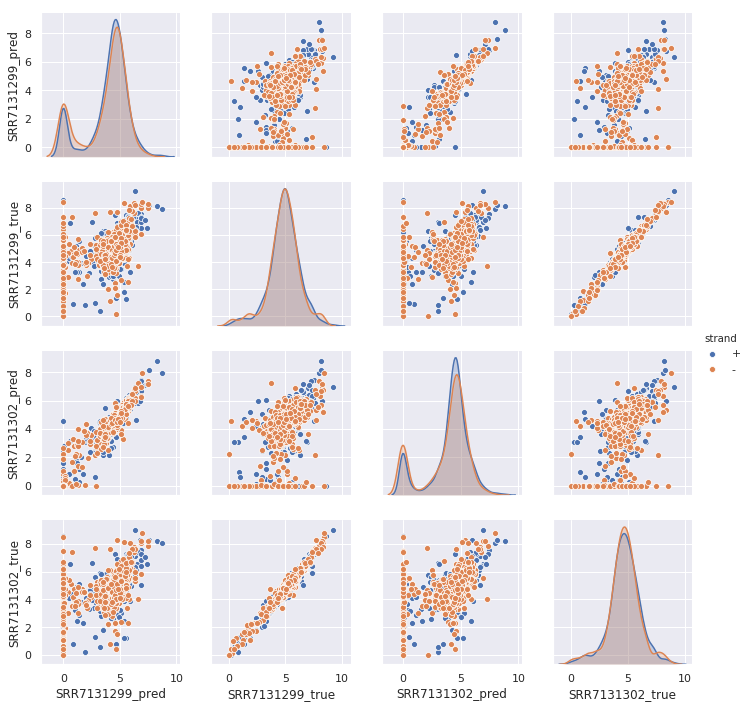

In [19]:
mean_activity = mean_activity.dropna()
sns.pairplot(mean_activity, hue='strand')

Commentaries :
    - SRR7131299 and SRR7131302 experimental are really similar. Nevertheless SRR7131302 is normally not aligned on the chromosome 4 wilde type.
    
    - The predictions miss some gene where the activity is predicted to be zero. But the two CNN miss the same genes.
    
    - The predicted mean activity and the experimental one are correlated, it mays fail to be precise enough.
    
    - no strand dependency.

#  Prediction on synthetic chromosome analysis

In this part we want to investigate : 
    - if the prediction on the synthetic chromosome is precise enough to predict the modification of gene activity.
    - if the training replica is important to improve the prediction

### Prediction vs Experimental (SRR7131302)

Text(0,11,' correlation (sum of pred): 0.435874432325')

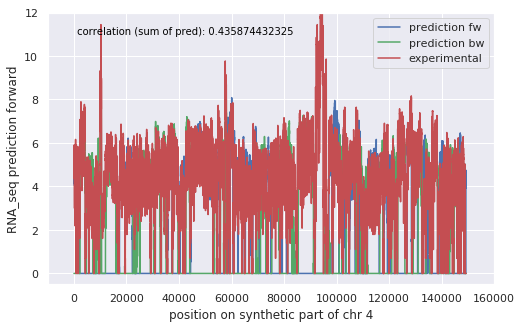

In [20]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes()

plt.plot(y_pred_fw_syn_302, color='b', label='prediction fw')
plt.plot(y_pred_bw_syn_302, color='g', label='prediction bw')
plt.plot(y_true_fw_syn_302, color='r', label='experimental')
plt.axis([-10000,160000,-0.5,12])
plt.legend(loc = 'upper right')
ax.set(xlabel='position on synthetic part of chr 4', ylabel='RNA_seq prediction forward')
ax.text(0, 11, ' correlation (sum of pred): {}'.format(pearsonr(y_pred_fw_syn_302 + y_pred_bw_syn_302, y_true_fw_syn_302)[0]), color='black', size=10,
       bbox=dict(facecolor='none', edgecolor='none'))



### Prediction for different CNN

Text(0,9,' correlation : 0.962750136852')

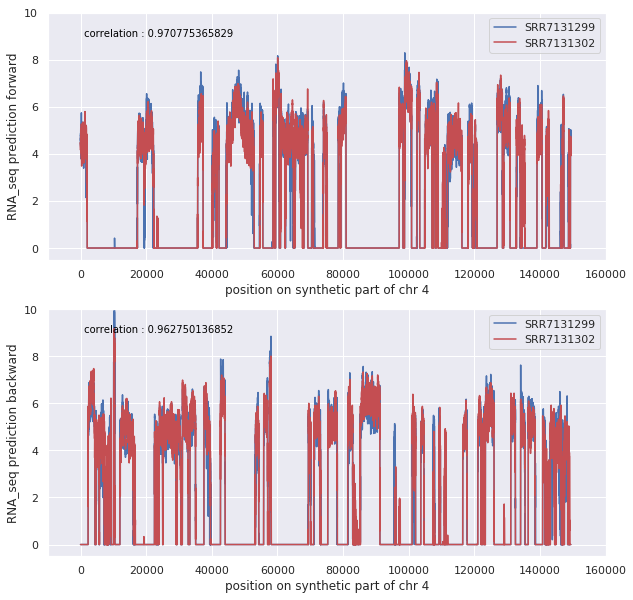

In [21]:
fig = plt.figure(figsize=(10,10))

ax = [None for _ in range(2)]
ax[0] = fig.add_subplot(2,1,1)

ax[0].plot(y_pred_fw_syn_299, color='b', label='SRR7131299')
ax[0].plot(y_pred_fw_syn_302, color='r', label='SRR7131302')
ax[0].axis([-10000,160000,-0.5,10])
ax[0].legend(loc = 'upper right')
ax[0].set(xlabel='position on synthetic part of chr 4', ylabel='RNA_seq prediction forward')
ax[0].text(0, 9, ' correlation : {}'.format(pearsonr(y_pred_fw_syn_299, y_pred_fw_syn_302)[0]), color='black', size=10,
       bbox=dict(facecolor='none', edgecolor='none'))

ax[1] = fig.add_subplot(2,1,2)

ax[1].plot(y_pred_bw_syn_299, color='b', label='SRR7131299')
ax[1].plot(y_pred_bw_syn_302, color='r', label='SRR7131302')
ax[1].axis([-10000,160000,-0.5,10])
ax[1].legend(loc='upper right')
ax[1].set(xlabel='position on synthetic part of chr 4', ylabel='RNA_seq prediction backward')
ax[1].text(0, 9, ' correlation : {}'.format(pearsonr(y_pred_bw_syn_299, y_pred_bw_syn_302)[0]), color='black', size=10,
       bbox=dict(facecolor='none', edgecolor='none'))

No dependence on the replica.

### Mean activity of genes

We need to compare the activity on the synthetic chromosome but the gene position are unknown.
We will take the predicted position of genes to establish the list (trained on SRR7131302 may be the best).

In [22]:
def find_orf(y):
    """
        Taking a RNA_seq density as entry and returning a list of tuple with start and stop of genes.
        
        This function add 1e-5 every times it encounters a 0 in y and substract 1e-5 elsewhere. Then taking the 
        peaks of this function can give the position of the beginning of genes. The peaks of its opposite give 
        the position of the end of genes.
        
        Args:
            y np.array
        Returns:
            list of tuple (start, stop)
    """
    zero_count = np.zeros(y.shape)
    zero_count[y == 0] = 1e-5
    zero_count[y > 0] = - 1e-5
    
    help_function = np.cumsum(zero_count)
    
    start = find_peaks(help_function, distance=200, width=250)[0]
    stop = find_peaks(-help_function, distance=200, width=250)[0]
    
    if stop[0] < start[0] :
        stop = stop[1:]
    
    return zip(start, stop)

In [23]:
gene_fw_syn = find_orf(y_pred_fw_syn_302)
gene_bw_syn = find_orf(y_pred_bw_syn_302)

In [24]:
mean_activity_true_fw_syn_302 = np.array([np.mean(y_true_fw_syn_302[int(start) : int(stop)]) for start, stop in gene_fw_syn])
mean_activity_true_bw_syn_302 = np.array([np.mean(y_true_fw_syn_302[int(start) : int(stop)]) for start, stop in gene_bw_syn])
mean_activity_true_syn_302 = np.append(mean_activity_true_fw_syn_302, mean_activity_true_bw_syn_302)

mean_activity_pred_fw_syn_299 = np.array([np.mean(y_pred_fw_syn_299[int(start) : int(stop)]) for start, stop in gene_fw_syn])
mean_activity_pred_bw_syn_299 = np.array([np.mean(y_pred_bw_syn_299[int(start) : int(stop)]) for start, stop in gene_bw_syn])
mean_activity_pred_syn_299 = np.append(mean_activity_pred_fw_syn_299, mean_activity_pred_bw_syn_299)

mean_activity_pred_fw_syn_302 = np.array([np.mean(y_pred_fw_syn_302[int(start) : int(stop)]) for start, stop in gene_fw_syn])
mean_activity_pred_bw_syn_302 = np.array([np.mean(y_pred_bw_syn_302[int(start) : int(stop)]) for start, stop in gene_bw_syn])
mean_activity_pred_syn_302 = np.append(mean_activity_pred_fw_syn_302, mean_activity_pred_bw_syn_302)

In [25]:
strand = np.array(['+' for _ in range(len(gene_fw_syn))])
strand_ =  np.array(['-' for _ in range(len(gene_bw_syn))])
strand = np.append(strand, strand_)

In [26]:
mean_activity_syn = pd.DataFrame({'SRR7131302_true' : mean_activity_true_syn_302,
                              'SRR7131299_pred' : mean_activity_pred_syn_299,
                              'SRR7131302_pred' : mean_activity_pred_syn_302,
                              'strand' : strand})
mean_activity_syn.head()

,SRR7131299_pred,SRR7131302_pred,SRR7131302_true,strand
0,4.544474,4.646742,4.343833,+
1,5.401407,5.064650,5.498756,+
2,4.076645,3.724367,3.371414,+
3,5.228968,5.011007,5.436747,+
4,5.118246,4.513855,5.427020,+


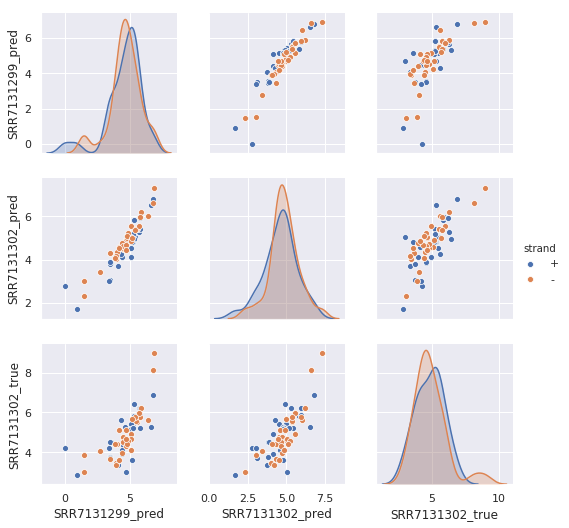

In [27]:
mean_activity_syn = mean_activity_syn.dropna()
sns.pairplot(mean_activity_syn, hue='strand')

The difference between the prediction on the synthetic chromosome and its experimental counterpart are sharp.
We need to further investigate if the precision is enough to detect the effect of mutation.

# Prediction of the effect of mutations

In this part we will investigate :
    - the difference in activation of genes in experimental RNA_seq densities.
    
    - if the prediction are able to reproduce those modifications.

In [28]:
y_true_fw_wt_299 = y_true_fw_wt_299[710006:]
y_pred_fw_wt_302 = y_pred_fw_wt_302[710006:]

In [29]:
y_true_bw_wt_299 = y_true_bw_wt_299[710006:]
y_pred_bw_wt_302 = y_pred_bw_wt_302[710006:]

In [30]:
gene_fw = np.array(gene_fw) - 710006
gene_fw = gene_fw[[(gene_fw[i,0] > 0 and gene_fw[i,1] > 0) for i in range(len(gene_fw))]]
gene_fw = gene_fw[[(gene_fw[i,0] < 150000 and gene_fw[i,1] < 150000) for i in range(len(gene_fw))]]

In [31]:
gene_fw_tmp = gene_fw.copy()
gene_fw_tmp[0,0] = gene_fw[0,0]
gene_fw_tmp[0,1] = gene_fw[1,1]
gene_fw_tmp = np.delete(gene_fw_tmp, 1, axis=0)
gene_fw_tmp = np.delete(gene_fw_tmp, 1, axis=0)
gene_fw_tmp = np.delete(gene_fw_tmp, 6, axis=0)
gene_fw_tmp[12,0] = gene_fw_tmp[12,0]
gene_fw_tmp[12,1] = gene_fw_tmp[13,1]
gene_fw_tmp = np.delete(gene_fw_tmp, 13, axis=0)
gene_fw_tmp = np.delete(gene_fw_tmp, 22, axis=0)
gene_fw_tmp = np.delete(gene_fw_tmp, 27, axis=0)
gene_fw_tmp = np.delete(gene_fw_tmp, 29, axis=0)
gene_fw_tmp = np.delete(gene_fw_tmp, 31, axis=0)

In [32]:
gene_fw_syn_tmp = np.array(gene_fw_syn)

In [33]:
len(gene_fw_tmp), len(gene_fw_syn_tmp)

(31, 31)

In [34]:
gene_bw = np.array(gene_bw) - 710006
gene_bw = gene_bw[[(gene_bw[i,0] > 0 and gene_bw[i,1] > 0) for i in range(len(gene_bw))]]
gene_bw = gene_bw[[(gene_bw[i,0] < 150000 and gene_bw[i,1] < 150000) for i in range(len(gene_bw))]]

In [35]:
gene_bw_tmp = gene_bw.copy()
gene_bw_tmp[1,0] = gene_bw_tmp[1,0]
gene_bw_tmp[1,1] = gene_bw_tmp[2,1]
gene_bw_tmp = np.delete(gene_bw_tmp, 2, axis=0)
gene_bw_tmp = np.delete(gene_bw_tmp, 5, axis=0)
gene_bw_tmp[5,0] = gene_bw_tmp[5,0]
gene_bw_tmp[5,1] = gene_bw_tmp[6,1]
gene_bw_tmp = np.delete(gene_bw_tmp, 6, axis=0)
gene_bw_tmp = np.delete(gene_bw_tmp, 12, axis=0)
gene_bw_tmp[13,0] = gene_bw_tmp[13,0]
gene_bw_tmp[13,1] = gene_bw_tmp[14,1]
gene_bw_tmp = np.delete(gene_bw_tmp, 14, axis=0)
gene_bw_tmp = np.delete(gene_bw_tmp, 18, axis=0)
gene_bw_tmp = np.delete(gene_bw_tmp, 23, axis=0)
gene_bw_tmp = np.delete(gene_bw_tmp, 26, axis=0)

In [36]:
gene_bw_syn_tmp = np.array(gene_bw_syn)
gene_bw_syn_tmp = np.delete(gene_bw_syn_tmp, 22, axis=0)

In [37]:
len(gene_bw_tmp), len(gene_bw_syn_tmp)

(33, 33)

In [38]:
mean_activity_true_fw_wt_299 = np.array([np.mean(y_true_fw_wt_299[int(pos[0]) : int(pos[1])]) for pos in gene_fw_tmp])
mean_activity_true_bw_wt_299 = np.array([np.mean(y_true_bw_wt_299[int(pos[0]) : int(pos[1])]) for pos in gene_bw_tmp])
mean_activity_true_wt_299 = np.append(mean_activity_true_fw_wt_299, mean_activity_true_bw_wt_299)

mean_activity_pred_fw_wt_302 = np.array([np.mean(y_pred_fw_wt_302[int(pos[0]) : int(pos[1])]) for pos in gene_fw_tmp])
mean_activity_pred_bw_wt_302 = np.array([np.mean(y_pred_bw_wt_302[int(pos[0]) : int(pos[1])]) for pos in gene_bw_tmp])
mean_activity_pred_wt_302 = np.append(mean_activity_pred_fw_wt_302, mean_activity_pred_bw_wt_302)

mean_activity_true_fw_syn_302 = np.array([np.mean(y_true_fw_syn_302[int(pos[0]) : int(pos[1])]) for pos in gene_fw_syn_tmp])
mean_activity_true_bw_syn_302 = np.array([np.mean(y_true_fw_syn_302[int(pos[0]) : int(pos[1])]) for pos in gene_bw_syn_tmp])
mean_activity_true_syn_302 = np.append(mean_activity_true_fw_syn_302, mean_activity_true_bw_syn_302)

mean_activity_pred_fw_syn_302 = np.array([np.mean(y_pred_fw_syn_302[int(pos[0]) : int(pos[1])]) for pos in gene_fw_syn_tmp])
mean_activity_pred_bw_syn_302 = np.array([np.mean(y_pred_bw_syn_302[int(pos[0]) : int(pos[1])]) for pos in gene_bw_syn_tmp])
mean_activity_pred_syn_302 = np.append(mean_activity_pred_fw_syn_302, mean_activity_pred_bw_syn_302)

In [39]:
strand = np.array(['+' for _ in range(len(gene_fw_tmp))])
strand_ =  np.array(['-' for _ in range(len(gene_bw_tmp))])
strand = np.append(strand, strand_)

In [40]:
mean_activity_final = pd.DataFrame({'wt_true' : mean_activity_true_wt_299,
                              'wt_pred' : mean_activity_pred_wt_302,
                              'syn_true' : mean_activity_true_syn_302,
                              'syn_pred' : mean_activity_pred_syn_302,
                              'strand' : strand})
mean_activity_final.head()

,strand,syn_pred,syn_true,wt_pred,wt_true
0,+,4.646742,4.343833,4.667889,4.341701
1,+,5.064650,5.498756,5.083511,5.731388
2,+,3.724367,3.371414,4.184364,4.006895
3,+,5.011007,5.436747,5.000867,5.069046
4,+,4.513855,5.427020,4.706861,6.238664


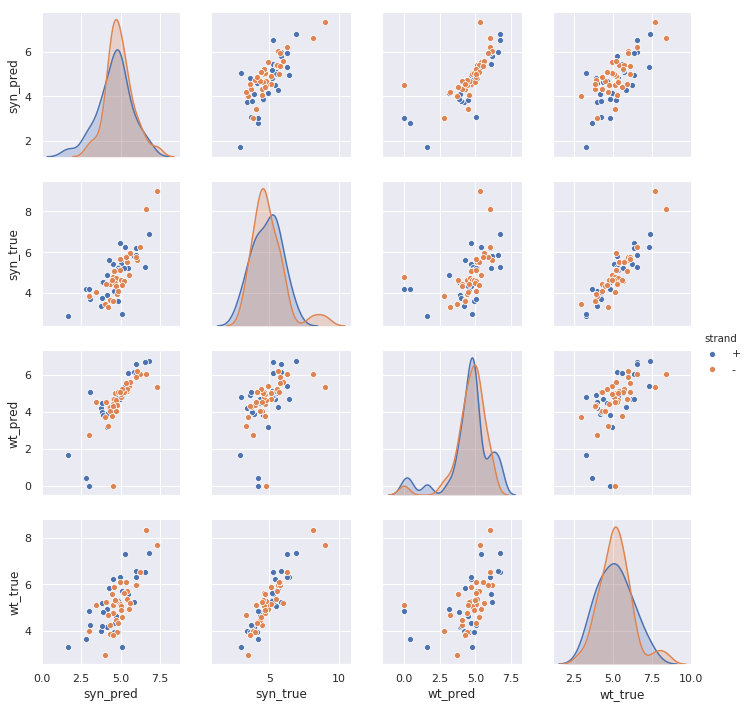

In [41]:
mean_activity_final = mean_activity_final.dropna()
sns.pairplot(mean_activity_final, hue='strand')